# K Nearest Neighbors

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## DataSet/s

In [ ]:
# Load Dataset
# Preview Dataset

df = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/Classified%20Data', index_col = 0)
df.tail()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1
999,0.837460,0.961184,0.417006,0.799784,0.934399,0.424762,0.778234,0.907962,1.257190,1.364837,1


In [ ]:
# Add Validation Dataset

data = [[0.575529,	0.955786,	0.941835,	0.792882,	1.414277,	1.269540,	1.055928,	0.713193,	0.958684,	1.663489, -1],
        [1.135470,	0.982462,	0.781905,	0.916738,	0.901031,	0.884738,	0.386802,	0.389584,	0.919191,	1.385504, -1],
       ]

validation_data = np.array(data)
validation_data = pd.DataFrame(data, index = [1000, 1001], columns = df.columns)
validation_data

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
1000,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,-1
1001,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,-1


In [ ]:
# Insert New Data to original DataFrame

df = pd.concat([df, validation_data], axis = 0)

In [ ]:
df.tail(5)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1
999,0.837460,0.961184,0.417006,0.799784,0.934399,0.424762,0.778234,0.907962,1.257190,1.364837,1
1000,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,-1
1001,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,-1


## Data Scaling

In [ ]:
# Import Standard Scaler

from sklearn.preprocessing import StandardScaler

In [ ]:
# You do not need the target class at this point (scaling)

X = df.drop('TARGET CLASS', axis = 1)

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [ ]:
# Transform the Data (Scaled Features)

scaled_features = scaler.transform(X)
scaled_features

array([[-0.12288748,  0.18716202, -0.91445675, ..., -1.47501344,
        -0.94864369, -0.64483789],
       [-1.08414234, -0.42951176, -1.02644178, ..., -0.19813818,
        -1.82735987,  0.63511938],
       [-0.7880206 ,  0.34067678,  0.30159708, ...,  0.28856887,
        -0.68130103, -0.37939748],
       ...,
       [-0.38698834, -0.59516983, -1.43289814, ..., -0.5627584 ,
         0.33863638,  0.00876729],
       [-1.29175008, -0.61618965,  0.3697607 , ..., -1.23536586,
        -0.67855118,  1.47173293],
       [ 0.64240084, -0.51230409, -0.1795596 , ..., -2.35290496,
        -0.81312734,  0.1100047 ]])

In [ ]:
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1]) # excluding the last column (:-1)
df_feat.tail()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
997,0.642400,-0.512303,-0.179559,1.021122,-0.540527,-0.230759,-2.255798,-2.352904,-0.813126,0.110005
998,0.467703,-0.982324,-1.466725,-0.072993,2.366747,0.000227,-0.419468,-0.033095,0.407694,-0.857174
999,-0.386988,-0.595170,-1.432898,0.511405,-0.403428,-2.027884,-0.723189,-0.562758,0.338636,0.008767
1000,-1.291750,-0.616190,0.369761,0.481322,1.568272,1.272663,0.364089,-1.235366,-0.678551,1.471733
1001,0.642401,-0.512304,-0.179560,1.021123,-0.540529,-0.230759,-2.255798,-2.352905,-0.813127,0.110005


## Train - Test Split

In [ ]:
# Import

from sklearn.model_selection import train_test_split

# Splits

X = df_feat.iloc[:1000,:]
y = df.iloc[:1000, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [ ]:
# df.iloc[:1000,-1]

In [ ]:
# Show some features X_train

X_train.head(5)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
290,-0.865127,-0.425246,-0.098984,-0.359775,-0.091827,-1.446891,0.943988,-0.706318,-1.415490,1.333499
167,-0.288972,0.429018,-0.325053,-0.292912,-1.047839,-0.848604,0.311327,-2.093496,-1.070658,0.808271
486,-1.627695,0.842244,1.165508,-0.987078,0.345791,-0.065714,1.008654,-0.180024,0.867009,-0.632500
683,-0.575450,-0.156867,0.102432,1.175780,-2.475447,-0.600817,-0.247271,0.265716,0.600480,1.374600
876,0.059854,1.008572,1.934193,2.225290,-0.570817,0.633707,2.425853,1.137521,0.106296,-0.177374


In [ ]:
# Show some features y_train

y_train.head(5)

290    0
167    1
486    0
683    1
876    0
Name: TARGET CLASS, dtype: int64

## KNN

In [ ]:
# Import

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Instance of KNN

model = KNeighborsClassifier(n_neighbors = 1) # 1? # 2? 3?

In [ ]:
# Fit

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Predictions

predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0])

## Evaluation Metrics

In [ ]:
# Import

from sklearn.metrics import classification_report, confusion_matrix

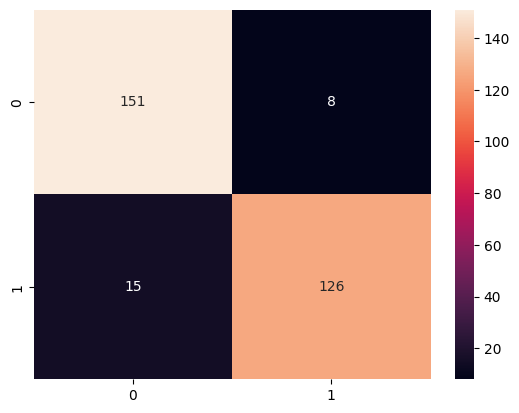

In [ ]:
# Confusion Matrix via Heat Map

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

In [ ]:
# Classification Report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



## Elbow Method for Selecting Optimized K Values

In [ ]:
# Iterate through error_rates

error_rate = []

for i in range(1, 100):

  model = KNeighborsClassifier(n_neighbors  = i)

  model.fit(X_train, y_train)
  pred_i = model.predict(X_test)

  error_rate.append(np.mean(pred_i != y_test))

#error_rate[12]
#error_rate[17]

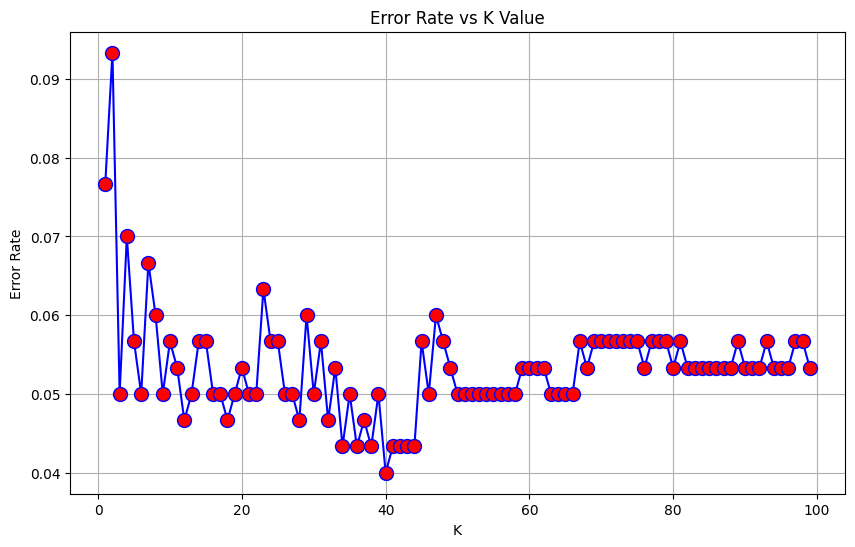

In [ ]:
# Plot Graph

plt.figure(figsize = (10,6))
plt.plot(range(1,100), error_rate, color = 'b', linestyle = '-', marker = 'o', markerfacecolor = 'r', markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

## Re-model with new values

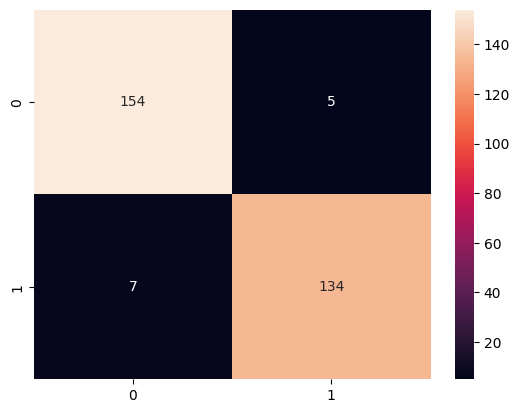

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       159
           1       0.96      0.95      0.96       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [ ]:
# Re-Model

new_model = KNeighborsClassifier(n_neighbors = 40)
new_model.fit(X_train, y_train)
predictions = new_model.predict(X_test)

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print(classification_report(y_test, predictions))

In [ ]:
# Sample Prediction on Unseen Data

validation_feature = df_feat.iloc[1000:,:]
y_predict = new_model.predict(validation_feature)

pd.concat([validation_feature, pd.DataFrame(y_predict, index = [1000, 1001], columns = ['Target'])], axis = 1)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,Target
1000,-1.291750,-0.616190,0.369761,0.481322,1.568272,1.272663,0.364089,-1.235366,-0.678551,1.471733,0
1001,0.642401,-0.512304,-0.179560,1.021123,-0.540529,-0.230759,-2.255798,-2.352905,-0.813127,0.110005,1


## Sample Decision Boundaries

In [ ]:
from mlxtend.plotting import plot_decision_regions

In [ ]:
# Prediction of Model on Test Data

X = X_test
y = predictions

x_label = 'WTT'
y_label = 'NXJ'

# Prediction on Unseen Data

sf_x = df_feat.loc[1000:, [x_label]]
sf_y = df_feat.loc[1000:, [y_label]]
sp = y_predict

In [ ]:
# Function

def knn_plots(X, y):

  features = X.values
  target = y

  new_model = KNeighborsClassifier(n_neighbors = 40)
  new_model.fit(features, target)

  plt.figure(figsize = (7,7))
  plt.title('KNN Decision Boundaries')
  plt.xlabel(x_label)
  plt.ylabel(y_label)

  plot_decision_regions(features, target, clf = new_model, legend = 2, colors = 'red,cyan')
  plt.scatter(x = sf_x, y = sf_y, c = sp, marker = 'X', s = 300, alpha = 0.65)

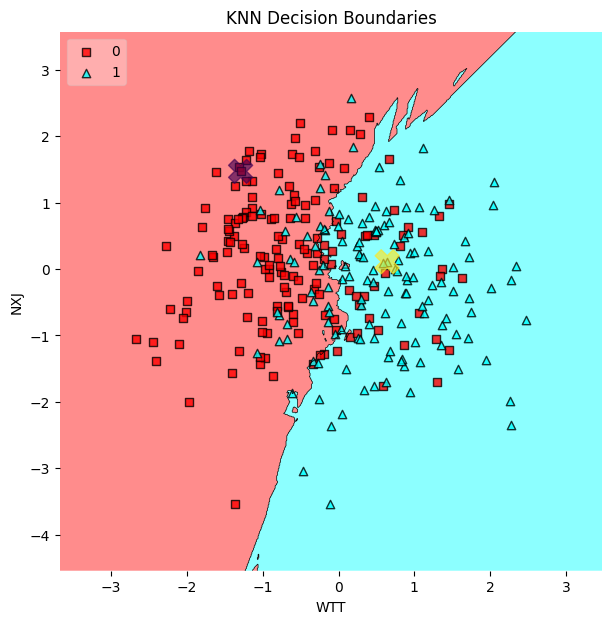

In [ ]:
# Execute Function =

knn_plots(X[[x_label, y_label]], y)

In [ ]:
# How about subplots?

features_1 = X[['WTT', 'PTI']].values
features_2 = X[['WTT', 'NXJ']].values

def knn_subplots(features_1, features_2):

    target = y

    fig, axes = plt.subplots(1,2, figsize = (20,5))

    new_model = KNeighborsClassifier(n_neighbors = 40)

    new_model.fit(features_1, y)

    fig = plot_decision_regions(features_1, target, clf = new_model, legend = 2, colors = 'red,cyan', ax = axes[0])
    fig = plt.scatter(x = sf_x, y = sf_y, c = sp, marker = 'X', s = 300, alpha = 0.65)

    new_model.fit(features_2, y)

    fig = plot_decision_regions(features_2, target, clf = new_model, legend = 2, colors = 'red,cyan', ax = axes[1])
    fig = plt.scatter(x = sf_x, y = sf_y, c = sp, marker = 'X', s = 300, alpha = 0.65)

    axes[0].set_title('WTT and PTI')
    axes[1].set_title('WTT and NXJ')

    plt.show()

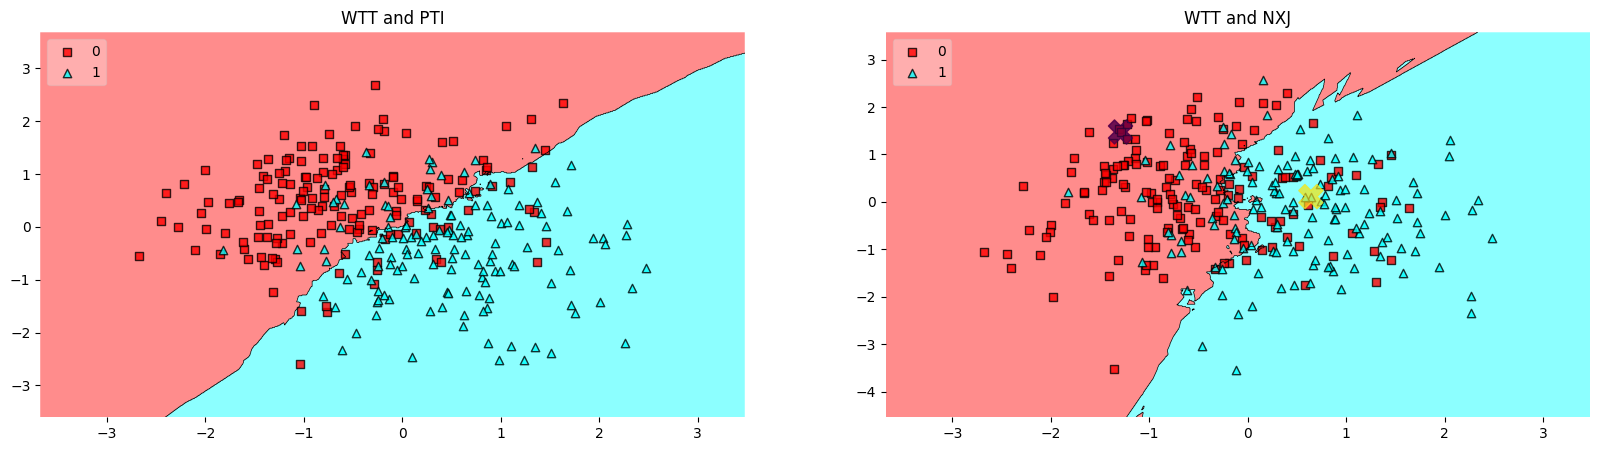

In [ ]:
knn_subplots(features_1, features_2)

In [ ]:
# Refactored Code

def knn_subplots_ver2(X, y):

  feature_combinations = [['WTT', 'PTI'], ['WTT', 'NXJ']]
  plot_titles = ['WTT and PTI', 'WTT and NXJ']

  fig, axes = plt.subplots(1, 2, figsize = (20,5))

  for i, features in enumerate(feature_combinations):

    new_model = KNeighborsClassifier(n_neighbors = 40)
    new_model.fit(X[features], y)

    plot_decision_regions(X[features].values, y, clf = new_model, legend = 2, colors = 'red,cyan', ax = axes[i])
    axes[i].scatter(x = sf_x, y = sf_y, c = sp, marker = 'X', s = 300, alpha = 0.65)
    axes[i].set_title(plot_titles[i])

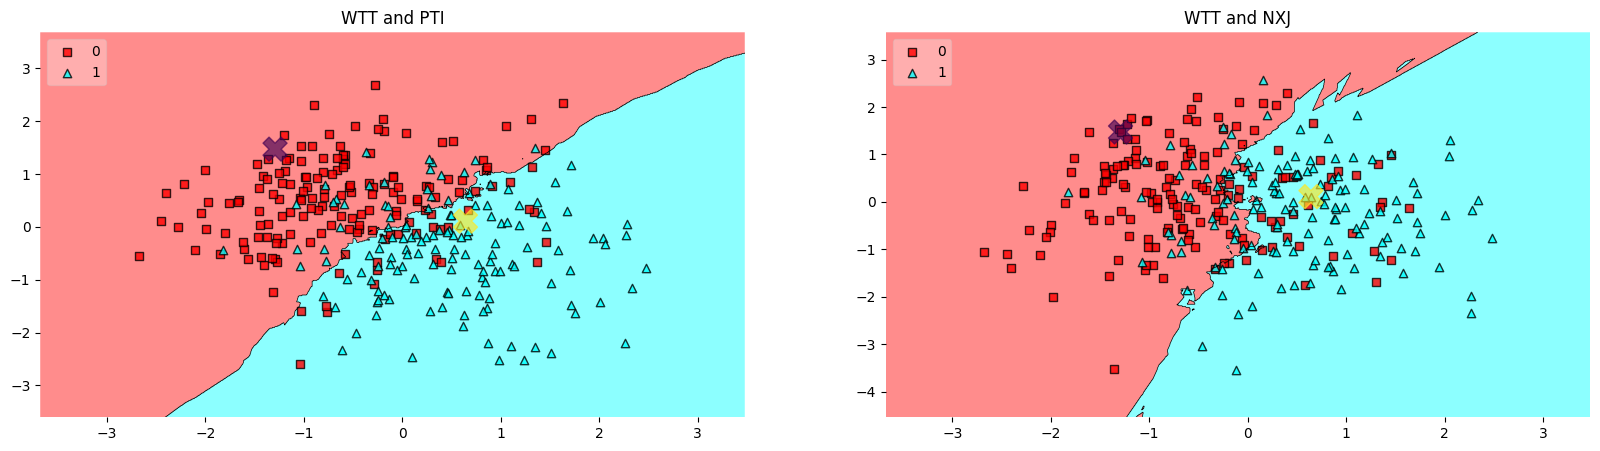

In [ ]:
knn_subplots_ver2(X, y)

In [ ]:
feature_combinations = [['WTT', 'PTI'], ['WTT', 'NXJ']]

list(enumerate(feature_combinations))

[(0, ['WTT', 'PTI']), (1, ['WTT', 'NXJ'])]